# **Text Preprocessing for NLP**

* 사용할 데이터:  https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

* 분석 목표: 캐글 옷 리뷰 데이터의 텍스트 칼럼(Review Text)에서 토큰(단어)를 추출하고 추천(Recommended IND)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것

### **Kaggle 데이터를 Colab에 업로드**

In [1]:
# Kaggle 데이터를 Colab에 업로드하는 방법: 1. Kaggle API 발급 후 files에 업로드   2. 아래 코드 진행  3. !kaggle datasets download -d 데이터작성자명/데이터이름

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soheeh","key":"77999eec7191489836bb985c79610edf"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 93.7MB/s]


In [4]:
!unzip womens-ecommerce-clothing-reviews.zip

Archive:  womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  


In [5]:
import pandas as pd

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### **전처리 진행 - 1. 소문자로 통일화**

In [7]:
# 분석 대상 feature와 target값을 지정합니다.
feature = 'Review Text'
target = 'Recommended IND'

In [9]:
# 데이터 타입을 String으로 변경 후, lower 함수 활용해 소문자로 변경/저장합니다.
df[feature] = df[feature].astype(str)
df[feature] = df[feature].apply(lambda x: x.lower())
df[feature].head(3)

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
Name: Review Text, dtype: object

### **전처리 진행 - 2.필요 없는 부호,공백 등 제거**

In [10]:
# re 라이브러리를 활용해 제거합니다.
import re
regex = r"[^a-zA-Z0-9 ]"
subst = ""

df[feature] = df[feature].apply(lambda x: re.sub(regex, subst, str(x)))

In [11]:
# 잘 제거되었는지 확인합니다.
df[feature].head(3)

0    absolutely wonderful  silky and sexy and comfo...
1    love this dress  its sooo pretty  i happened t...
2    i had such high hopes for this dress and reall...
Name: Review Text, dtype: object

### **Tokenization**

In [12]:
# 소문자 정제를 완료했으므로, karas에 비해 세밀하게 쪼개는 nltk tokenizer를 활용해 토큰화를 진행합니다.

from nltk.tokenize import WordPunctTokenizer

df['tokens'] = df[feature].apply(lambda x: WordPunctTokenizer().tokenize(x))
df['tokens'].head(3)

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, its, sooo, pretty, i, happ...
2    [i, had, such, high, hopes, for, this, dress, ...
Name: tokens, dtype: object

### 3) 정제한 토큰을 시각화 합니다.
- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.
- 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.
- 문항 3) 추천 토큰 순위 10개 단어를 입력하시오.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

### **Token 정보 확인 - 1. 최빈 Token값 확인 (상위 10개)**

In [13]:
!pip install squarify

In [14]:
# 필요한 lib를 import 합니다.
from collections import Counter
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer

In [15]:
# df['tokens']의 토큰값들을 Counter 함수에 update 시켜줍니다. 그러면 Counter 함수가 자체적으로 가장 빈도가 높은 토큰들을 순차적으로 출력해줍니다.

word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 75568),
 ('i', 58428),
 ('and', 48805),
 ('a', 42776),
 ('it', 42325),
 ('is', 30614),
 ('this', 25603),
 ('to', 24434),
 ('in', 20550),
 ('but', 16361)]

### **Token 정보 확인 - 2. Token의 수**

In [16]:
# 토큰의 종류 수 확인
len(word_counts.values())

21078

In [17]:
# 총 토큰 수 확인
sum(word_counts.values())

1355958

In [18]:
# 전체 토큰 수 대비 토큰의 차지 비율 확인

def word_count(docs):
  
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)
    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [19]:
wc_manual = word_count(df['tokens'])

In [20]:
# 결과 데이터프레임 

wc_manual.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
8,the,19673,75568,1.0,0.055730,0.055730,0.837648
16,i,18902,58428,2.0,0.043090,0.098820,0.804820
5,and,19535,48805,3.0,0.035993,0.134813,0.831772
9,a,17747,42776,4.0,0.031547,0.166360,0.755642
14,it,16284,42325,5.0,0.031214,0.197574,0.693349
47,is,15337,30614,6.0,0.022577,0.220151,0.653027
32,this,16467,25603,7.0,0.018882,0.239033,0.701141
28,to,13827,24434,8.0,0.018020,0.257053,0.588734
44,in,12302,20550,9.0,0.015155,0.272208,0.523801
96,but,11704,16361,10.0,0.012066,0.284274,0.498339


### **추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화**


In [21]:
# Recommend, Unrecommend 여부에 따라 달라지는 텍스트 비중 확인위해, df['Recommended IND'] 나눠 token값 집계한 결과값을 추가
recomend = Counter()
unrecomend = Counter()

for index, val in enumerate(df['Recommended IND']) :
  if val == 1 :
    recomend.update(df['tokens'][index]) 
  else :
    unrecomend.update(df['tokens'][index])

unrecommend_df = pd.DataFrame(zip(unrecomend.keys(), unrecomend.values()), columns =['word','unrecommend'])
recommend_df = pd.DataFrame(zip(recomend.keys(), recomend.values()), columns =['word','recommend'])

In [22]:
wc_manual = wc_manual.merge(unrecommend_df, on='word')
wc_manual = wc_manual.merge(recommend_df, on='word')

In [23]:
wc_manual.head(3)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent,unrecommend,recommend
0,the,19673,75568,1.0,0.055730,0.055730,0.837648,16012,59556
1,i,18902,58428,2.0,0.043090,0.098820,0.804820,10654,47774
2,and,19535,48805,3.0,0.035993,0.134813,0.831772,8188,40617


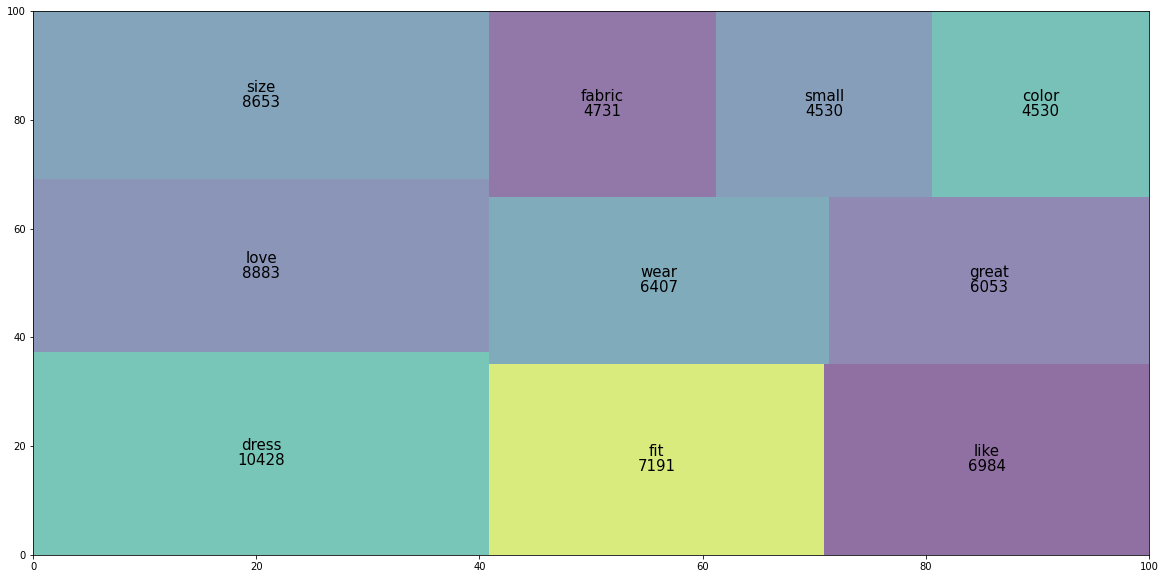

In [96]:
# 트리맵 차트를 이용한 시각화
fig, ax = plt.subplots(figsize=(20,10))
wc_manual_top10 = wc_manual.sort_values(by='rank')[:10]

squarify.plot(sizes=wc_manual_top10['percent'], label=wc_manual_top10['word'], value = wc_manual_top10['count'], alpha=0.6, text_kwargs={'fontsize':15})

**그래프 확인 결과, 불용어가 많은 비율을 차지하여 정제가 필요할 것으로 보임**

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.

- 문항 4) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하시오.

### **불용어 제거 (Stop Words)**

참고링크: 토크나이저 설명 https://spacy.io/api/tokenizer

In [ ]:
# 불용어 제거를 위해 필요한 lib import
import spacy
from spacy.tokenizer import Tokenizer

# tokenizer 생성
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

# 불용어 사전 검색
nlp.Defaults.stop_words

In [41]:
# 추가할 불용어 지정
STOP_WORDS = nlp.Defaults.stop_words.union(['i','you', 'it', "'", 'but', 'to', 'it.', 'the', 'this', ' ', 'im'])

In [42]:
# 토큰을 재정의

tokens = []

for doc in tokenizer.pipe(df[feature]):
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [43]:
# 불용어 제거된 토큰의 통계값 산출
wc_manual = word_count(df['tokens'])
wc_manual.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
11,dress,6034,10428,1.0,0.017934,0.017934,0.256919
17,love,7386,8883,2.0,0.015277,0.033212,0.314485
46,size,6517,8653,3.0,0.014882,0.048093,0.277484
58,fit,6107,7191,4.0,0.012367,0.060461,0.260027
123,like,5722,6984,5.0,0.012011,0.072472,0.243635
67,wear,5514,6407,6.0,0.011019,0.083491,0.234778
66,great,5157,6053,7.0,0.010410,0.093901,0.219578
181,fabric,4102,4731,8.0,0.008137,0.102038,0.174657
56,small,3643,4530,9.0,0.007791,0.109828,0.155114
99,color,3999,4530,10.0,0.007791,0.117619,0.170272


In [44]:
recomend = Counter()
unrecomend = Counter()

for index, val in enumerate(df['Recommended IND']) :
  if val == 1 :
    recomend.update(df['tokens'][index]) 
  else :
    unrecomend.update(df['tokens'][index])

unrecommend_df = pd.DataFrame(zip(unrecomend.keys(), unrecomend.values()), columns =['word','unrecommend'])
recommend_df = pd.DataFrame(zip(recomend.keys(), recomend.values()), columns =['word','recommend'])

wc_manual = wc_manual.merge(unrecommend_df, on='word')
wc_manual = wc_manual.merge(recommend_df, on='word')

In [45]:
wc_manual.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent,unrecommend,recommend
0,dress,6034,10428,1.0,0.017934,0.017934,0.256919,1957,8471
1,love,7386,8883,2.0,0.015277,0.033212,0.314485,922,7961
2,size,6517,8653,3.0,0.014882,0.048093,0.277484,1191,7462
3,fit,6107,7191,4.0,0.012367,0.060461,0.260027,1308,5883
4,like,5722,6984,5.0,0.012011,0.072472,0.243635,1735,5249
5,wear,5514,6407,6.0,0.011019,0.083491,0.234778,752,5655
6,great,5157,6053,7.0,0.010410,0.093901,0.219578,526,5527
7,fabric,4102,4731,8.0,0.008137,0.102038,0.174657,1231,3500
8,small,3643,4530,9.0,0.007791,0.109828,0.155114,877,3653
9,color,3999,4530,10.0,0.007791,0.117619,0.170272,705,3825


### 5) 통계적 트리밍 사용 전/후 토큰 분포를 비교합니다.
- 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 선택한 뒤,
- 통계적 트리밍 사용 전/후 토큰 분포 시각화하고,
- 문항 5-1) 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.
- 문항 5-2) 불용어 처리 & 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.

### **통계적 트리밍**
※ 통계적 트리밍이란 : 기존에 알려진 불용어를 제거하는 대신 코퍼스에서 통계적인 방법을 통해 단어를 제거하는 방법

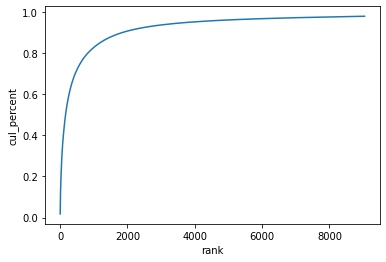

In [54]:
# 통계적 트리밍 사용 이전 결과. 상위 1,500여개가 전체의 약 80% 이상을 차지하는 것을 알 수 있음
sns.lineplot(x='rank', y='cul_percent', data=wc_manual);

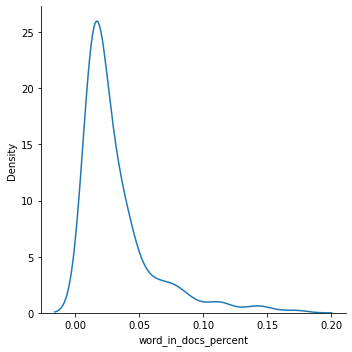

In [58]:
# 통계적 트리밍 사용 이후 결과. 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 지정
wc_manual_trimming = wc_manual[(wc_manual['word_in_docs_percent']<=0.2) & (wc_manual['word_in_docs_percent']>=0.01)]

# 선형 그래프 출력해야 하므로, kind='kde'로 지정
sns.displot(wc_manual_trimming['word_in_docs_percent'], kind='kde');

In [62]:
# 통계적 트리밍 이후 토큰 분포 확인
wc_manual_trimming.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent,unrecommend,recommend
7,fabric,4102,4731,8.0,0.008137,0.102038,0.174657,1231,3500
8,small,3643,4530,9.0,0.007791,0.109828,0.155114,877,3653
9,color,3999,4530,10.0,0.007791,0.117619,0.170272,705,3825
10,look,3490,4001,11.0,0.006881,0.124500,0.148599,958,3043
11,ordered,3449,3824,12.0,0.006577,0.131077,0.146853,821,3003
12,little,3282,3768,13.0,0.006480,0.137557,0.139743,363,3405
13,perfect,3337,3718,14.0,0.006394,0.143952,0.142085,197,3521
14,flattering,3292,3458,15.0,0.005947,0.149899,0.140169,449,3009
15,soft,3140,3297,16.0,0.005670,0.155569,0.133697,290,3007
16,comfortable,2912,3016,17.0,0.005187,0.160756,0.123989,170,2846


### 6) Lemmatization 사용 효과를 분석해 봅니다.
- 문항 6-1) Stemming한 뒤 상위 10개 단어를 입력하시오.
- 문항 6-2) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하시오.

### **Stemming**

In [99]:
# 필요한 lib import 및 PorterStemmer 정의
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# 토큰화된 자료를 불러 와 stemming한 뒤, df['stem']에 저장.
tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

# 토큰의 비율 등 자료 산출하는 함수(이전에 정의)에 df['stems'] 입력
wc = word_count(df['stems'])

In [100]:
# Recommend, Unrecommend 여부에 따라 달라지는 텍스트 비중 확인위해, df['Recommended IND'] 나눠 token값 집계한 결과값을 추가
recomend = Counter()
unrecomend = Counter()

for index, val in enumerate(df['Recommended IND']) :
  if val == 1 :
    recomend.update(df['lemmas'][index]) 
  else :
    unrecomend.update(df['lemmas'][index])

unrecommend_df = pd.DataFrame(zip(unrecomend.keys(), unrecomend.values()), columns =['word','unrecommend'])
recommend_df = pd.DataFrame(zip(recomend.keys(), recomend.values()), columns =['word','recommend'])

wc = wc.merge(unrecommend_df, on='word')
wc = wc.merge(recommend_df, on='word')

wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent,unrecommend,recommend
0,dress,6747,12022,1.0,0.020676,0.020676,0.287278,2093,9843
1,love,9165,11302,2.0,0.019438,0.040113,0.390232,1320,8922
2,fit,8971,11252,3.0,0.019352,0.059465,0.381972,1581,9109
3,size,7446,10551,4.0,0.018146,0.077611,0.317040,1455,8564
4,look,7116,9253,5.0,0.015914,0.093524,0.302989,2377,6832
5,wear,6672,8037,6.0,0.013822,0.107347,0.284084,1231,8825
6,like,6207,7705,7.0,0.013251,0.120598,0.264285,1887,5690
7,color,6093,7142,8.0,0.012283,0.132881,0.259431,1016,5916
8,great,5158,6054,9.0,0.010412,0.143293,0.219620,526,5536
9,order,4198,4975,10.0,0.008556,0.151849,0.178745,989,3977


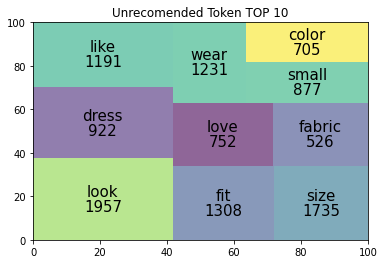

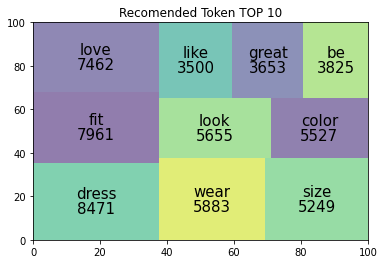

In [101]:
# df['Recommended IND'] 별 token 수 시각화
wc_top10 = wc.sort_values(by='unrecommend', ascending=False)[:10]
squarify.plot(sizes=wc_top10['unrecommend'], label=wc_top10['word'], value = wc_manual_top10['unrecommend'], alpha=0.6, text_kwargs={'fontsize':15})
plt.title('Unrecomended Token TOP 10')
plt.show()

wc_top10 = wc.sort_values(by='recommend', ascending=False)[:10]
squarify.plot(sizes=wc_top10['recommend'], label=wc_top10['word'], value = wc_manual_top10['recommend'], alpha=0.6, text_kwargs={'fontsize':15})
plt.title('Recomended Token TOP 10')
plt.show()

### **Lemmatization**

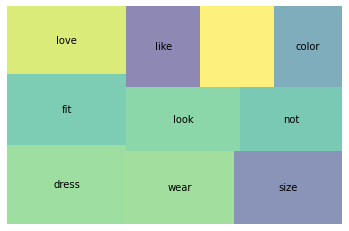

In [95]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        # 불용어/구두점/대명사(?)/추가 불용어에 해당하는지 확인 후, 모두 해당하지 않으면 리스트에 df['lammas'] 리스트에 저장
        ### STOP_WORDS 적용 안되어 문제 해결 필요
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df[feature].apply(get_lemmas)

# 토큰의 비율 등 자료 산출하는 함수(이전에 정의)에 df['lemmas'] 입력
wc = word_count(df['lemmas'])

# 상기 wc를 통해, 상위 10개의 토큰 시각화
wc_top10 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [97]:
# Recommend, Unrecommend 여부에 따라 달라지는 텍스트 비중 확인위해, df['Recommended IND'] 나눠 token값 집계한 결과값을 추가
recomend = Counter()
unrecomend = Counter()

for index, val in enumerate(df['Recommended IND']) :
  if val == 1 :
    recomend.update(df['lemmas'][index]) 
  else :
    unrecomend.update(df['lemmas'][index])

unrecommend_df = pd.DataFrame(zip(unrecomend.keys(), unrecomend.values()), columns =['word','unrecommend'])
recommend_df = pd.DataFrame(zip(recomend.keys(), recomend.values()), columns =['word','recommend'])

wc = wc.merge(unrecommend_df, on='word')
wc = wc.merge(recommend_df, on='word')

wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent,unrecommend,recommend
0,dress,6690,11936,1.0,0.020076,0.020076,0.284851,2093,9843
1,fit,8664,10690,2.0,0.017980,0.038056,0.368901,1581,9109
2,love,8449,10242,3.0,0.017227,0.055283,0.359746,1320,8922
3,wear,7896,10056,4.0,0.016914,0.072197,0.336200,1231,8825
4,size,7156,10019,5.0,0.016852,0.089049,0.304692,1455,8564
5,look,7095,9209,6.0,0.015489,0.104538,0.302095,2377,6832
6,not,6464,8303,7.0,0.013965,0.118503,0.275228,1982,6321
7,like,6121,7577,8.0,0.012744,0.131247,0.260623,1887,5690
8,,4193,7530,9.0,0.012665,0.143913,0.178532,1271,6259
9,color,5960,6932,10.0,0.011659,0.155572,0.253768,1016,5916


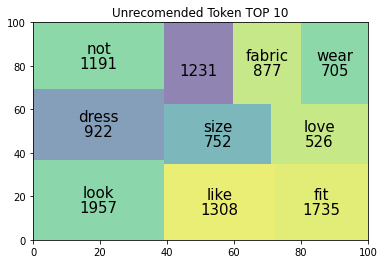

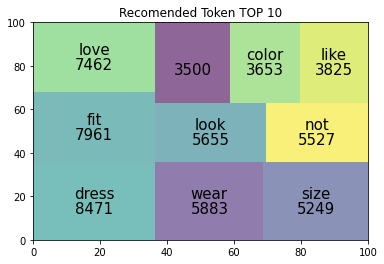

In [98]:
# df['Recommended IND'] 별 token 수 시각화
wc_top10 = wc.sort_values(by='unrecommend', ascending=False)[:10]
squarify.plot(sizes=wc_top10['unrecommend'], label=wc_top10['word'], value = wc_manual_top10['unrecommend'], alpha=0.6, text_kwargs={'fontsize':15})
plt.title('Unrecomended Token TOP 10')
plt.show()

wc_top10 = wc.sort_values(by='recommend', ascending=False)[:10]
squarify.plot(sizes=wc_top10['recommend'], label=wc_top10['word'], value = wc_manual_top10['recommend'], alpha=0.6, text_kwargs={'fontsize':15})
plt.title('Recomended Token TOP 10')
plt.show()

### 도전과제🔥 
- Spacy 기능을 추가적으로 한 가지 사용해 봅니다.
- 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 